In [1]:
import numpy as np 
import math as m
import random as r 
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy.spatial import distance
import random
from random import randint

In [2]:
def displayingGrid(save = False, j = 0, plot = False):
    cmap = col.ListedColormap(['red' , 'white', 'blue'])
    plt.figure(figsize=(8,8))
    plt.pcolormesh(gridMatrix , edgecolor='black' , cmap=cmap)
    if save == True:
        filename = 'plots/' + str(j) +'.png'
        plt.savefig(filename)
    #if plot == True:
        #plt.show()

In [3]:
def showGrid():
    cmap = col.ListedColormap(['red' , 'white', 'blue'])
    plt.figure(figsize=(8,8))
    plt.pcolormesh(gridMatrix , edgecolor='black' , cmap=cmap)
    plt.show()

In [4]:
def changePos(x,y):
    switchTemp = r.sample(empPositions , 1)
    xPosEmpty = (switchTemp[0]-1)//dim
    yPosEmpty = ((switchTemp[0]-1)%dim)
    gridMatrix[xPosEmpty][yPosEmpty] = gridMatrix[x][y]
    gridMatrix[x][y] = 0
    for q in range(numEmptyCell):
        if(empPositions[q] == switchTemp[0]):
            empPositions[q] = x*dim+y+1
    return gridMatrix, xPosEmpty, yPosEmpty, empPositions

In [5]:
def changePosWithEmpty(x,y,r,t):
    xPosEmpty = r
    yPosEmpty = t
    gridMatrix[xPosEmpty][yPosEmpty] = gridMatrix[x][y]
    gridMatrix[x][y] = 0
    for q in range(numEmptyCell):
        if(empPositions[q] == r*dim+t+1):
            empPositions[q] = x*dim+y+1
    return gridMatrix, xPosEmpty, yPosEmpty, empPositions

In [6]:
def comeBack(i,j,n,m):
    gridMatrix[i][j] = gridMatrix[n][m]
    gridMatrix[n][m] = 0
    for q in range(numEmptyCell):
        if(empPositions[q] == i*dim+j+1):
            empPositions[q] = n*dim+m+1
    return gridMatrix, empPositions

In [7]:
def switchAgent(i,j,c,v):
    tempValue = gridMatrix[i][j]
    i_rand = c
    j_rand = v
    '''while (gridMatrix[i_rand][j_rand] == 0):
            i_rand = randint(0, dim-1)
            j_rand = randint(0, dim-1)
    
    if gridMatrix[i_rand][j_rand] == 0:
        gridMatrix[i_rand][j_rand] = gridMatrix[i][j]
        gridMatrix[i][j] = 0
        for q in range(numEmptyCell):
            if(empPositions[q] == i_rand*dim+j_rand+1):
                empPositions[q] = i*dim+j+1
        return gridMatrix, i_rand, j_rand, empPositions, -1 ,-1
    else:'''
    gridMatrix[i][j] = gridMatrix[i_rand][j_rand]
    gridMatrix[i_rand][j_rand] = tempValue
    
    return gridMatrix, i_rand, j_rand, i, j
    

In [8]:
def percentHappy():
    k = 0
    for u in range(dim):
        for v in range(dim):
            if(gridMatrix[u][v] == 0):
                pass
            else:
                satisfy = satisfactionCalculator(u , v)
                if(satisfy >= tolerance):
                    k += 1
                else:
                    pass
    
    return ((k/population)*100)

In [9]:
def percentHappyBoundary():
    k = 0
    for u in range(dim):
        for v in range(dim):
            if(gridMatrix[u][v] == 0):
                pass
            else:
                satisfy = satisfactionCalculatorBoundary(u , v)
                if(satisfy >= tolerance):
                    k += 1
                else:
                    pass
    
    return ((k/population)*100)

In [10]:
def satisfactionCalculator(i , j):
    same = 0
    different = 0
    if(gridMatrix[i][j] == 0):
        pass
    else:
        neighbourIndex = [[i,j-1] , [i,j+1] , [i-1,j] , [i+1,j] , [i-1,j-1] , [i-1,j+1] , [i+1,j-1] , [i+1,j+1]]
        validIndex = [x for x in neighbourIndex if (0<=x[0]<=dim-1) and (0<=x[1]<=dim-1)]
        for x in validIndex:
            if(gridMatrix[x[0]][x[1]] == gridMatrix[i][j]):
                same += 1
            elif(gridMatrix[x[0]][x[1]] == -gridMatrix[i][j]):
                different += 1
    
    if(same+different != 0):
        return ((same/(same+different)) * 100)
    else:
        return 100

In [11]:
def satisfactionCalculatorBoundary(i , j):
    same = 0
    different = 0
    if(gridMatrix[i][j] == 0):
        pass
    else:
        neighbourIndex = [[i,j-1] , [i,j+1] , [i-1,j] , [i+1,j] , [i-1,j-1] , [i-1,j+1] , [i+1,j-1] , [i+1,j+1]]
        validIndexBoundary = []
        for x in neighbourIndex:
            if (0<=x[0]<=dim-1) and (0<=x[1]<=dim-1):
                validIndexBoundary.append(x)
            else:
                if x[0] < 0:
                    x[0] = dim-1
                elif x[0] > dim-1:
                    x[0] = 0
                if x[1] < 0:
                    x[1] = dim-1
                elif x[1] > dim-1:
                    x[1] = 0
        for x in validIndexBoundary:
            if(gridMatrix[x[0]][x[1]] == gridMatrix[i][j]):
                same += 1
            elif(gridMatrix[x[0]][x[1]] == -gridMatrix[i][j]):
                different += 1
    
    if(same+different != 0):
        return ((same/(same+different)) * 100)
    else:
        return 100

In [12]:
def calcUtility(x_utility, i, j):
    same = 0
    different = 0
    if(gridMatrix[i][j] == 0):
        pass
    else:
        neighbourIndex = [[i,j-1] , [i,j+1] , [i-1,j] , [i+1,j] , [i-1,j-1] , [i-1,j+1] , [i+1,j-1] , [i+1,j+1]]
        validIndex = [x for x in neighbourIndex if (0<=x[0]<=dim-1) and (0<=x[1]<=dim-1)]
        for x in validIndex:
            if(gridMatrix[x[0]][x[1]] == gridMatrix[i][j]):
                same += 1
            elif(gridMatrix[x[0]][x[1]] == -gridMatrix[i][j]):
                different += 1
    if same+different == 0:
        return 1
    ratio = different/(same+different)
    
    if ratio <= x_utility:
        return 1
    elif ratio > x_utility:
        return 0
    else:
        return -1

In [13]:
def calcUtilityBoundary(x_utility, i, j):
    same = 0
    different = 0
    if(gridMatrix[i][j] == 0):
        pass
    else:
        neighbourIndex = [[i,j-1] , [i,j+1] , [i-1,j] , [i+1,j] , [i-1,j-1] , [i-1,j+1] , [i+1,j-1] , [i+1,j+1]]
        validIndexBoundary = []
        for x in neighbourIndex:
            if (0<=x[0]<=dim-1) and (0<=x[1]<=dim-1):
                validIndexBoundary.append(x)
            else:
                if x[0] < 0:
                    x[0] = dim-1
                elif x[0] > dim-1:
                    x[0] = 0
                if x[1] < 0:
                    x[1] = dim-1
                elif x[1] > dim-1:
                    x[1] = 0
        for x in validIndexBoundary:
            if(gridMatrix[x[0]][x[1]] == gridMatrix[i][j]):
                same += 1
            elif(gridMatrix[x[0]][x[1]] == -gridMatrix[i][j]):
                different += 1
                
    if same+different == 0:
        return 1
    ratio = different/(same+different)
    
    if ratio <= x_utility:
        return 1
    elif ratio > x_utility:
        return 0
    else:
        return -1

In [14]:
dim = int(100)
numEmptyCell = 3000
population = pow(dim,2)-numEmptyCell

gridMatrix = np.zeros((dim,dim))        #Creating a matrix of same size as our grid. This matrix represents our grid

#This indicates the ratio between X and Y agents
xPercent = float(50)
popuRatio = xPercent/100


In [15]:
#from 0 to 100 %
tolerance = 50

In [16]:
gridList = [x for x in range(1 , (dim*dim)+1)]

xPositions = r.sample(gridList , int(popuRatio*population))     #Cell numbers of all x agents
yPositions = r.sample([x for x in gridList if x not in xPositions] , population-int(popuRatio*population))  #Cell numbers of all y agents
empPositions = [x for x in [x for x in gridList if x not in xPositions] if x not in yPositions]     #Cell numbers of all empty cells
#Emptyspace is given by the difference between dim^2 - population

k = 0
for i in range(dim):
    for j in range(dim):
        k += 1
        if(k in xPositions):
            gridMatrix[i][j] = -1           #For agent x, the matrix element will have value -1
        elif(k in yPositions):
            gridMatrix[i][j] = 1            #For agent y, the matrix element will have value 1

In [17]:
xVector = [i for i in range(100)]
yVector = [i for i in range(100)]
random.shuffle(xVector)
random.shuffle(yVector)

In [18]:
xyVector = []
for i in range(100):
    x_vector = np.ones(100,dtype = int) * i
    xy_vector = np.stack((x_vector.tolist(), yVector),axis = -1).tolist()
    xyVector.append(xy_vector)

In [19]:
XY_vector = xyVector[0]
for i in range(99):
    XY_vector = XY_vector + xyVector[i+1]
random.shuffle(XY_vector)

# Utility function 

## Solid State

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


/tmp/ipykernel_653997/652433345.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,8))


22
23
24
25
26
27
28
29
30


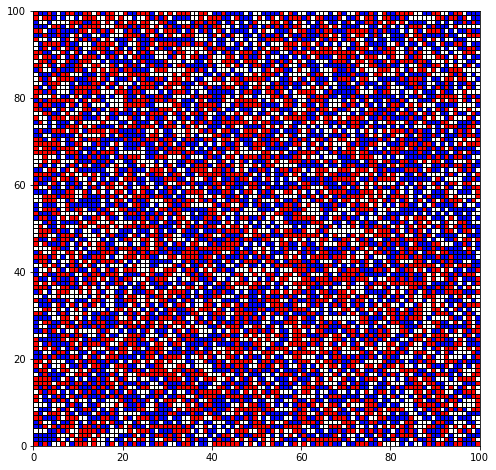

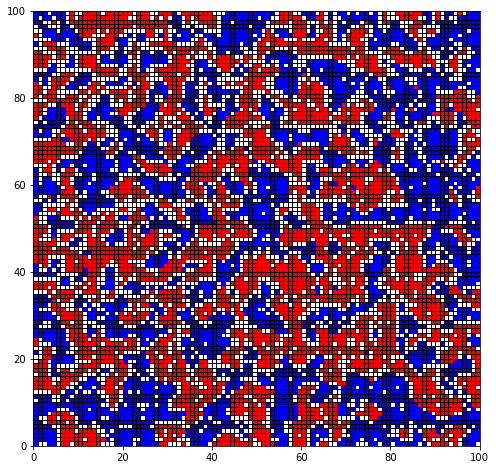

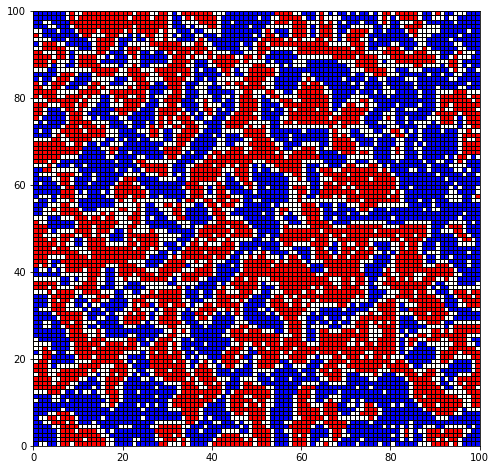

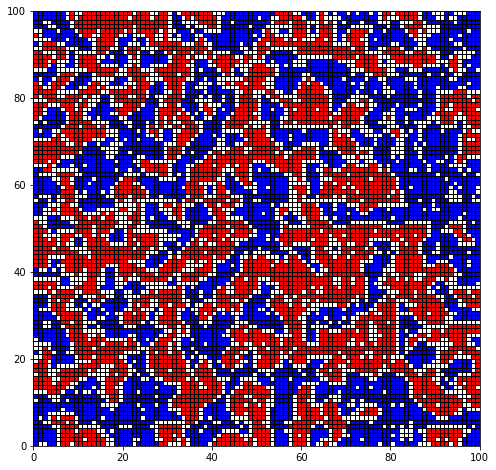

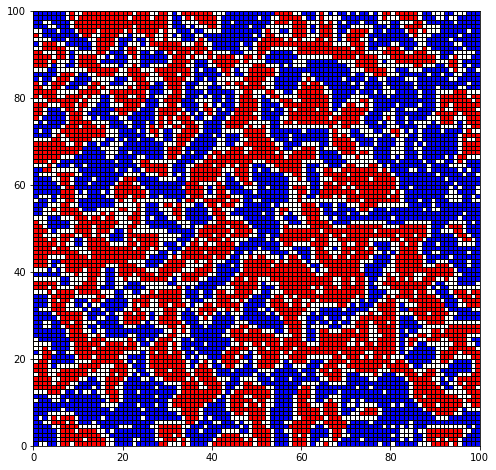

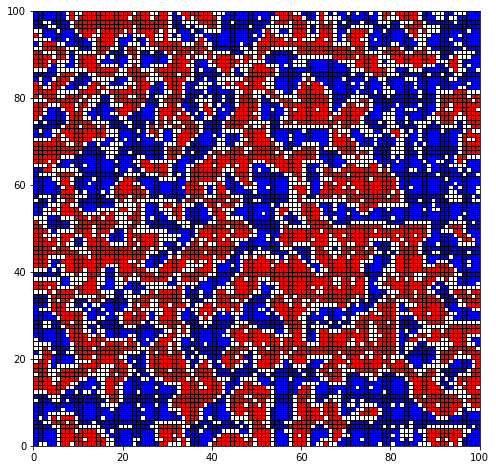

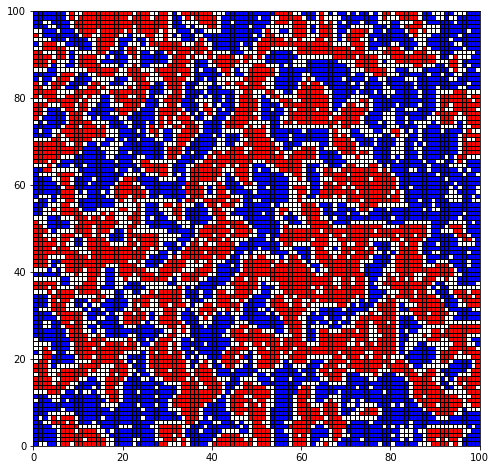

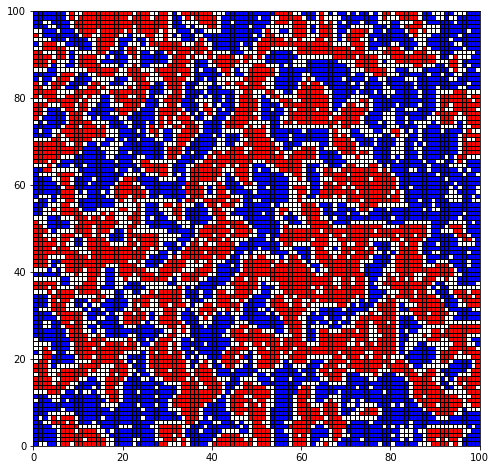

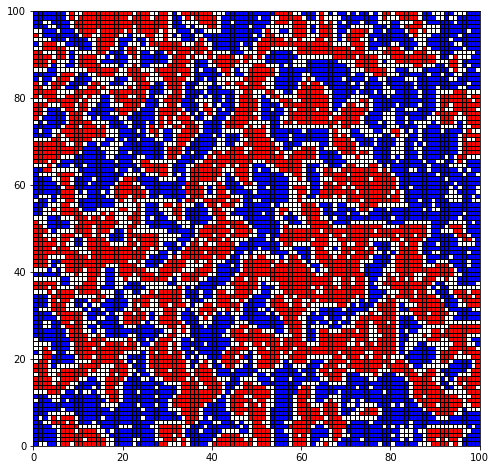

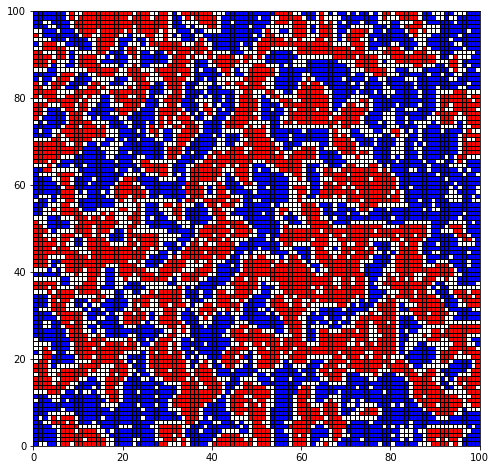

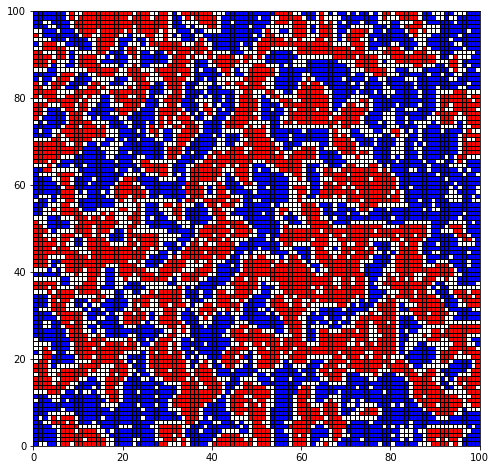

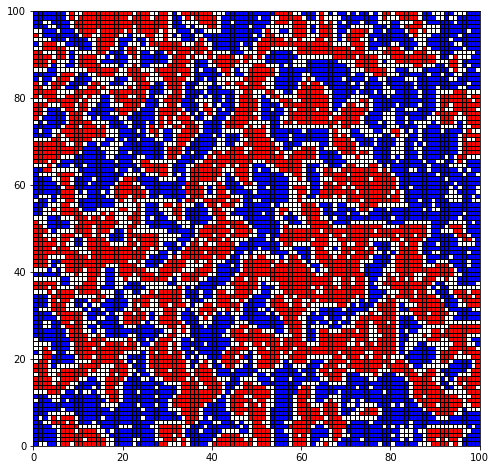

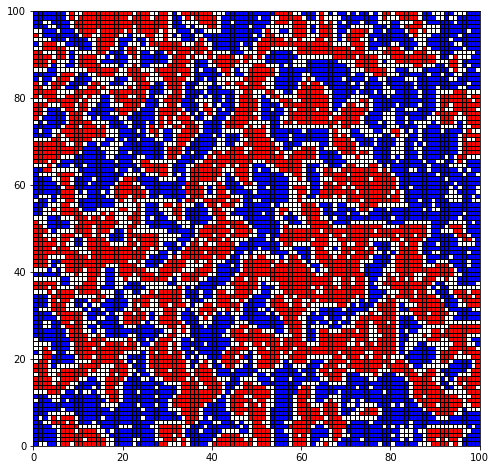

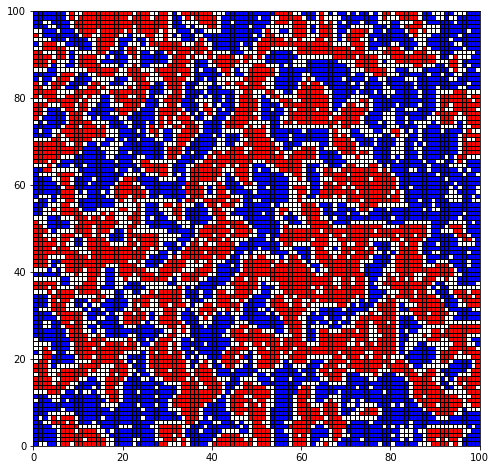

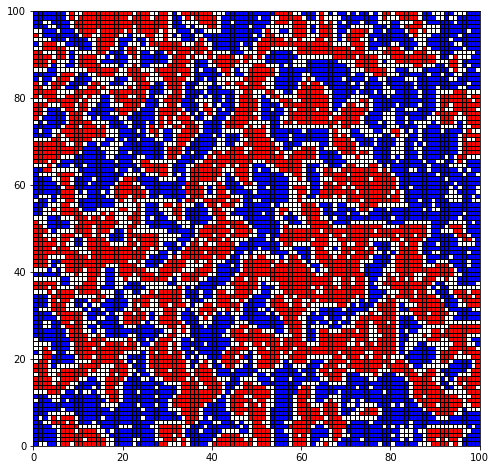

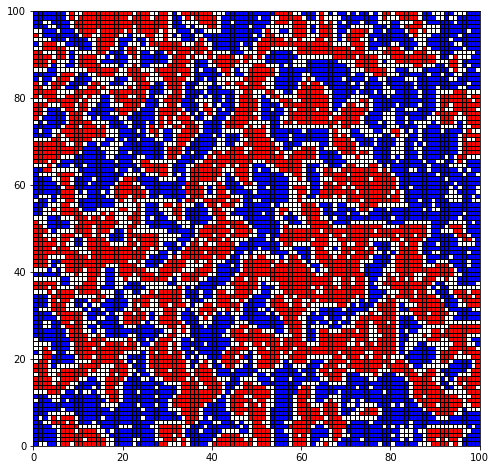

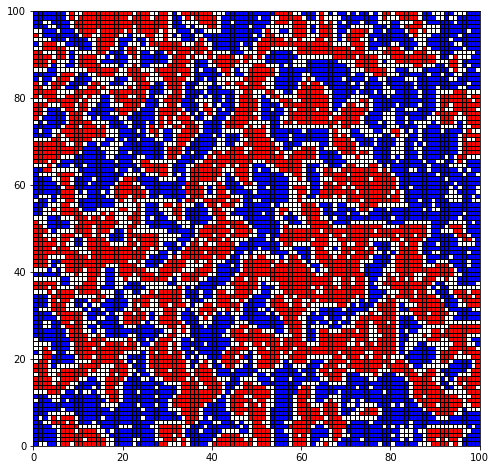

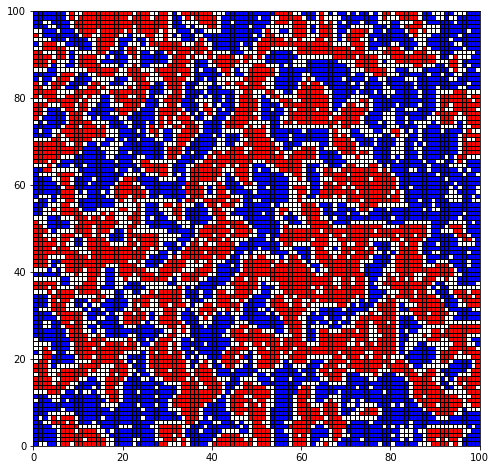

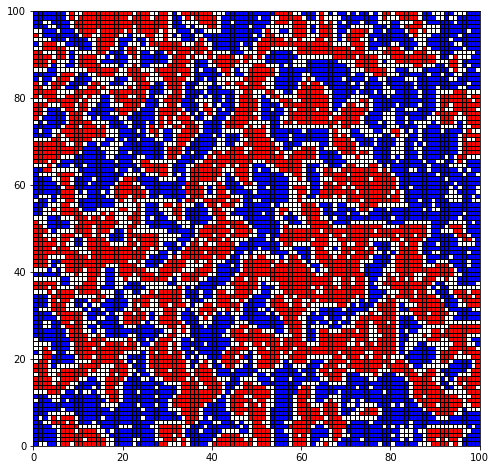

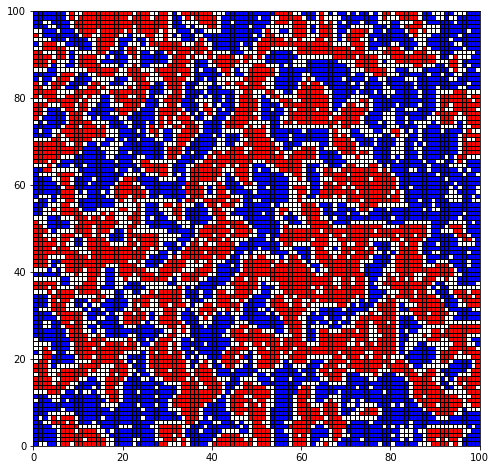

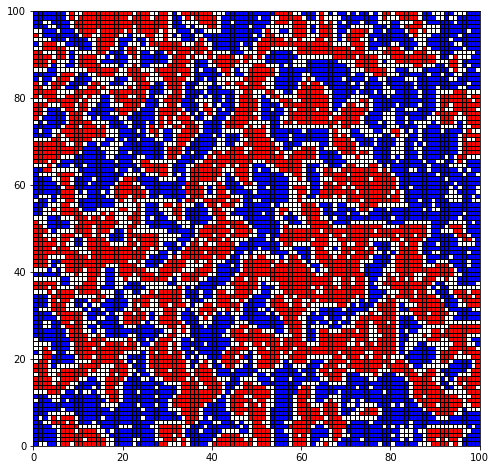

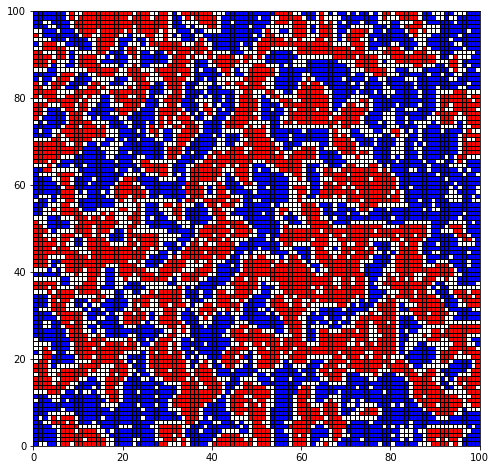

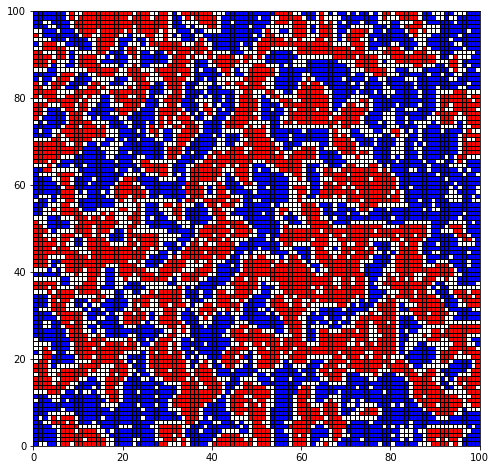

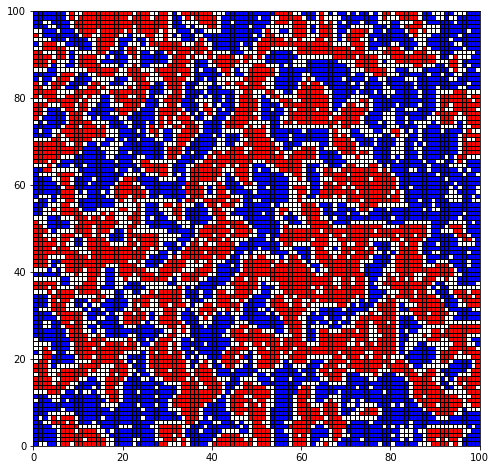

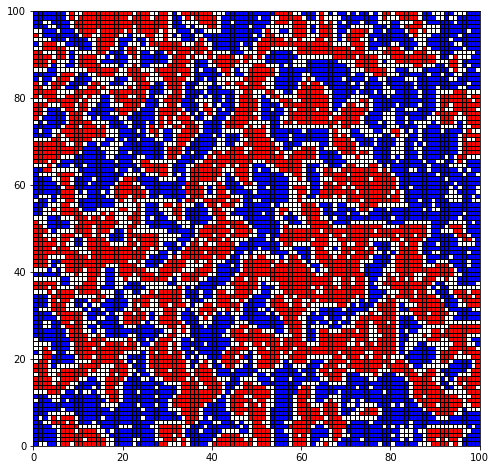

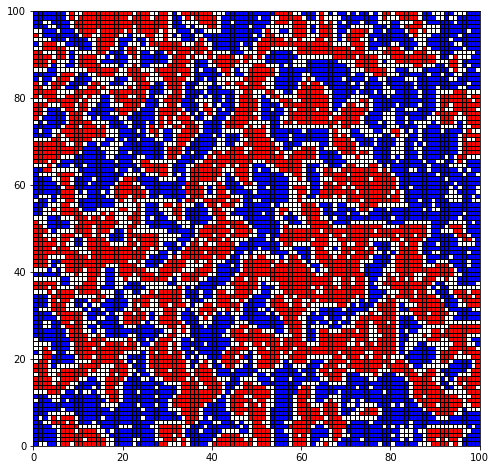

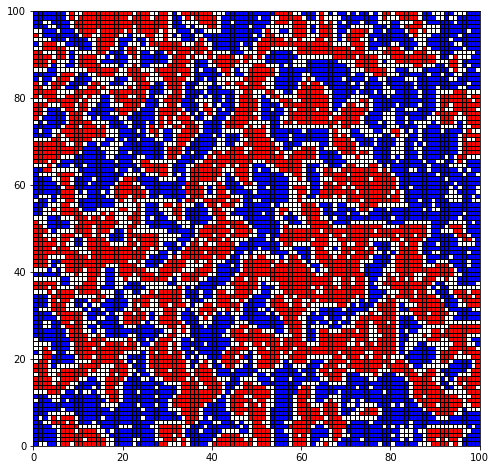

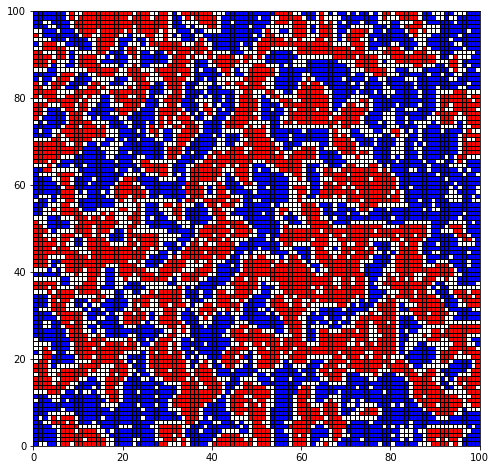

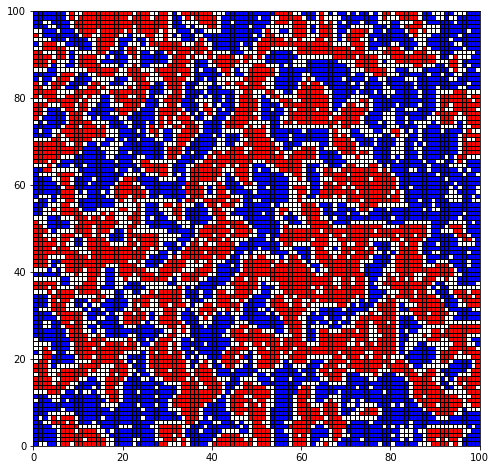

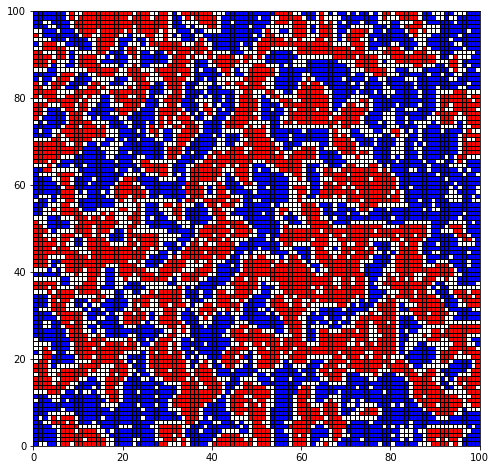

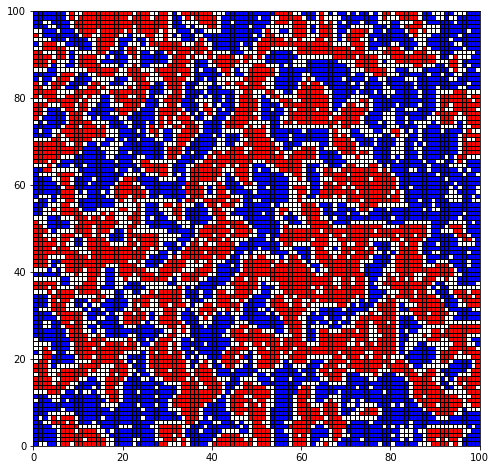

In [20]:
#Using utility function defined as (2) in the article. 
x_utility = 0.375 ####3/8
step = 0 
h = 0
happy = 0
happyList = []
happy = percentHappy()    
happyList.append(happy) 
while (step <= 30):
    print(step)
    figures = displayingGrid(save = True, j = step)
    for i in xVector:
    #for i in range(dim):
        for j in yVector:
        #for j in range(dim):
            if(gridMatrix[i][j] == 0):
                pass
            else:
                utilityStatus = 0
                utility = calcUtility(x_utility, i ,j)
                if(utility == 1):
                    pass
                else:
                    m, n = i, j
                    while(utilityStatus == 0):
                        gridMatrix, m, n, empPositions  = changePos(m,n)
                        utility_new = calcUtility(x_utility, m , n)
                        if(utility_new > utility):
                            utilityStatus = 1
                        else:
                            pass
                        
    happy = percentHappy()    
    happyList.append(happy)  
    step += 1

<IPython.core.display.Javascript object>


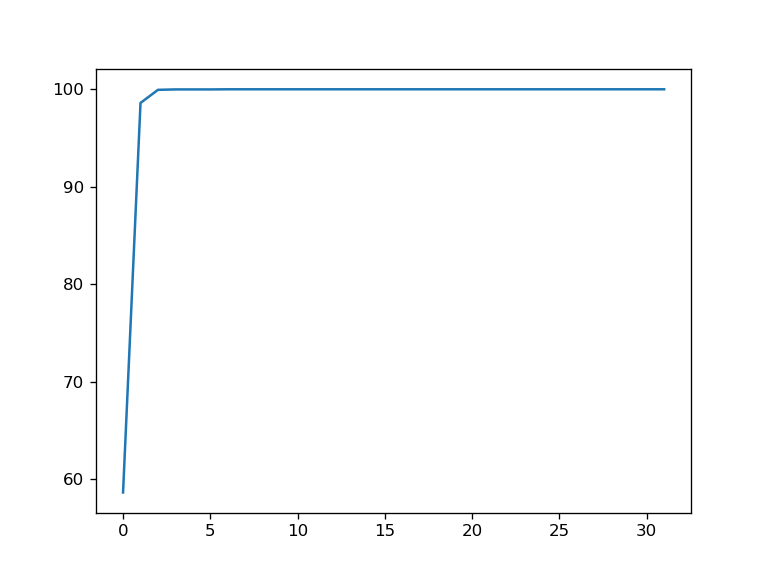

In [21]:
%matplotlib notebook
plt.plot(happyList)

## Liquid state

### No boundary conditions

In [ ]:
#Using utility function defined as (2) in the article. Particles move even their utility function remain constant
x_utility = 0.5 ####3/8
step = 0 
h = 0
happy = 0
happyList = []
happy = percentHappy()    
happyList.append(happy) 
while (step <= 150):
    print(step)
    figures = displayingGrid(save = True, j = step)
    for x in XY_vector:
        i = x[0]
        j = x[1]
        if(gridMatrix[i][j] == 0):
            pass
        else:
            utilityStatus = 0
            utility = calcUtility(x_utility, i ,j)
            m, n = i, j
            #g = 0
            while(utilityStatus == 0):
                #if g == 5:
                    #print("stam psass")
                    #pass
                #g = g + 1
                gridMatrix, m, n, empPositions  = changePos(m,n)
                utility_new = calcUtility(x_utility, m , n)
                if(utility_new >= utility):
                    utilityStatus = 1
                else:
                    pass
                        
    happy = percentHappy()    
    happyList.append(happy)  
    step += 1

In [ ]:
%matplotlib notebook
plt.plot(happyList)

### Periodic Boundary conditions

In [ ]:
#Using utility function defined as (2) in the article. Particles move even their utility function remain constant
x_utility = 0.5 ####3/8
step = 0 
h = 0
happy = 0
happyList = []
happy = percentHappy()    
happyList.append(happy) 
while (step <= 150):
    print(step)
    figures = displayingGrid(save = True, j = step)
    for x in XY_vector:
        i = x[0]
        j = x[1]
        if(gridMatrix[i][j] == 0):
            pass
        else:
            utilityStatus = 0
            utility = calcUtilityBoundary(x_utility, i ,j)
            m, n = i, j
            #g = 0
            while(utilityStatus == 0):
                #if g == 5:
                    #print("stam psass")
                    #pass
                #g = g + 1
                gridMatrix, m, n, empPositions  = changePos(m,n)
                utility_new = calcUtilityBoundary(x_utility, m , n)
                if(utility_new >= utility):
                    utilityStatus = 1
                else:
                    pass
                        
    happy = percentHappy()    
    happyList.append(happy)  
    step += 1

## Swap agent

In [ ]:
#Using utility function defined as (2) in the article. 
x_utility = 0.5 ####3/8
step = 0 
h = 0
happy = 0
happyList = []
happy = percentHappy()    
happyList.append(happy) 
while (step <= 100):
    print(step)
    figures = displayingGrid(save = True, j = step)
    for i in xVector:
    #for i in range(dim):
        for j in yVector:
        #for j in range(dim):
            if(gridMatrix[i][j] == 0):
                pass
            else:
                utilityStatus = 0
                utility = calcUtility(x_utility, i ,j)
                m, n = i, j
                while(utilityStatus == 0):
                    i_rand = randint(0, dim-1)
                    j_rand = randint(0, dim-1)
                    if(gridMatrix[i_rand][j_rand] == 0):
                        pass
                        '''gridMatrix, m, n, empPositions  = changePosWithEmpty(m,n,i_rand,j_rand)
                        utility_new = calcUtility(x_utility, m , n)
                        if(utility_new >= utility):
                            utilityStatus = 1
                        else:
                            pass'''
                    else:
                        if gridMatrix[m][n] == gridMatrix[i_rand][j_rand]:
                            pass
                        else:
                            utility_1 = calcUtility(x_utility, m , n)
                            utility_2 = calcUtility(x_utility, i_rand , j_rand)
                            gridMatrix, m, n, p, q  = switchAgent(m,n,i_rand,j_rand)
                            utility_new_1 = calcUtility(x_utility, m , n)
                            utility_new_2 = calcUtility(x_utility, p, q)
                            if(utility_new_1 > utility_1) and (utility_new_2 > utility_2):
                                utilityStatus = 1
                            else:
                                pass
                        
    happy = percentHappy()    
    happyList.append(happy)  
    step += 1

In [ ]:
%matplotlib notebook
plt.plot(happyList)